In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
url = 'https://api.github.com/search/repositories?q=replication+code+language%3Astata&type=Repositories&page='

In [3]:
item = 30
page = 1
while item < 103:
    page += 1
    item += 30

In [4]:
result = []
i = 0
while i < 4:
    res = requests.get(f'{url}{i+1}')
    res = res.json()
    res = res['items']
    result.append(res)
    i += 1

In [5]:
created_at = []
for i in result:
    for j in i:
        created_at.append(j['created_at'][:4])

In [6]:
df = pd.DataFrame(created_at, columns=['created_at'])
df = df.groupby('created_at').size().to_frame().reset_index()
df = df.rename(columns = {0: 'count'})
df = df.sort_values(by='created_at', ascending = True)

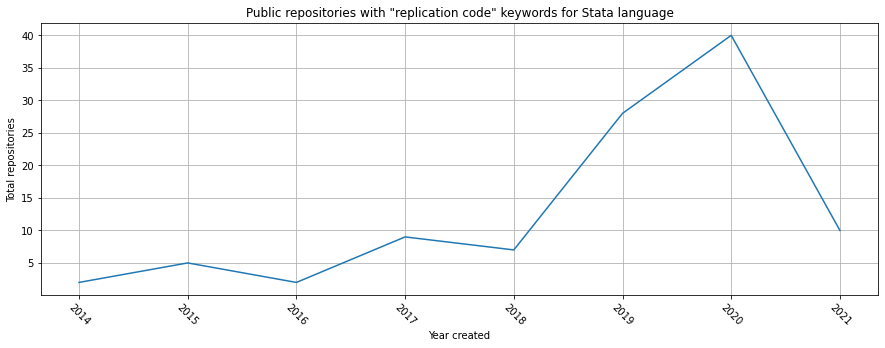

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot('created_at', 'count', data=df)
plt.grid(b=True)
plt.title('Public repositories with "replication code" keywords for Stata language')
plt.xticks(rotation=-45)
plt.xlabel('Year created')
plt.ylabel('Total repositories')
plt.savefig('img/replication-code-stata.png')